In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
df = pd.read_csv('zadacha2.csv', sep=";", header=0, encoding='cp1251')
print df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
ID_CREDITS              200000 non-null int64
DATE_BEGIN              200000 non-null object
AMOUNT                  200000 non-null object
term_months             200000 non-null int64
INTEREST_RATE_EFFECT    200000 non-null object
dtypes: int64(2), object(3)
memory usage: 7.6+ MB
None


,ID_CREDITS,DATE_BEGIN,AMOUNT,term_months,INTEREST_RATE_EFFECT
0,1,03.05.2017,300000,48,"14,9"
1,2,11.07.2017,130046,30,"14,9"
2,3,14.06.2017,505000,60,"20,9"
3,4,17.07.2017,893355,60,"20,9"
4,5,27.07.2017,103189,12,"15,55"


In [54]:
df.INTEREST_RATE_EFFECT = df.INTEREST_RATE_EFFECT.str.replace(',','.')
df.INTEREST_RATE_EFFECT = df.INTEREST_RATE_EFFECT.astype('float64')
df.AMOUNT = df.AMOUNT.str.replace(',','.')
df.AMOUNT = df.AMOUNT.astype('float64')

In [55]:
df.DATE_BEGIN = pd.to_datetime(df.DATE_BEGIN, format='%d.%m.%Y')

In [56]:
df.DATE_BEGIN.max()
df['month'] =  df.DATE_BEGIN.apply(lambda x : x.month)

In [57]:
cols = ['Остаток на начало периода','Остаток на конец периода',
'СДО за период','Сумма начисленных процентов',
'Средневзвешенная ставка за период','Объем выдач за период',
'Объем погашения за период','month','kvartal']
table1 = pd.DataFrame(index = range(1,17) ,columns=np.arange(9), data = 0.0)
table1.columns = cols

In [58]:
table1

,Остаток на начало периода,Остаток на конец периода,СДО за период,Сумма начисленных процентов,Средневзвешенная ставка за период,Объем выдач за период,Объем погашения за период,month,kvartal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
for i in range(1,13):
    table1['Объем выдач за период'][i]=df[df.month==i].AMOUNT.sum()
#df[df.month==12].AMOUNT.sum()

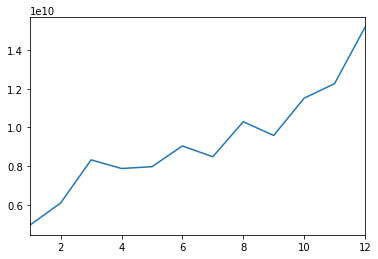

In [60]:
table1['Объем выдач за период'][:12].plot()

In [61]:
df.head()

,ID_CREDITS,DATE_BEGIN,AMOUNT,term_months,INTEREST_RATE_EFFECT,month
0,1,2017-05-03,300000.0,48,14.90,5
1,2,2017-07-11,130046.0,30,14.90,7
2,3,2017-06-14,505000.0,60,20.90,6
3,4,2017-07-17,893355.0,60,20.90,7
4,5,2017-07-27,103189.0,12,15.55,7


In [62]:
df['day'] =  df.DATE_BEGIN.apply(lambda x : x.day)

In [63]:
import datetime
base = df.DATE_BEGIN.min()
date_list = [base + datetime.timedelta(days=x) for x in range(0, 363)]

In [64]:
table_day = pd.DataFrame(index = date_list ,columns=np.arange(9), data = 0.0)

In [65]:
table_day.columns = cols
table_day

,Остаток на начало периода,Остаток на конец периода,СДО за период,Сумма начисленных процентов,Средневзвешенная ставка за период,Объем выдач за период,Объем погашения за период,month,kvartal
2017-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
for i in table_day.index:
    table_day['Объем выдач за период'][i]=df[df.DATE_BEGIN==i].AMOUNT.sum()

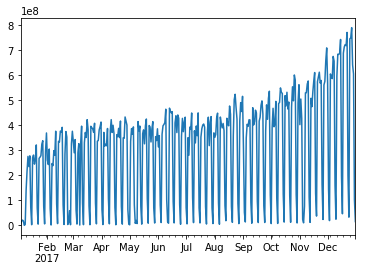

In [69]:
table_day['Объем выдач за период'].plot()

In [72]:
table1

,Остаток на начало периода,Остаток на конец периода,СДО за период,Сумма начисленных процентов,Средневзвешенная ставка за период,Объем выдач за период,Объем погашения за период,month,kvartal
1,0.0,0.0,0.0,0.0,0.0,4.972054e+09,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,6.102810e+09,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,8.329303e+09,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,7.883295e+09,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,7.976273e+09,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,9.046923e+09,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,8.489423e+09,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.029619e+10,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,9.587684e+09,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,1.151257e+10,0.0,0.0,0.0


In [115]:
df['platezh']= df.AMOUNT*(df.INTEREST_RATE_EFFECT/12/100)/(1-((1-df.INTEREST_RATE_EFFECT/12/100)**(df.term_months)))

In [129]:
# Расчсет аннуитетного платежа
a = df.AMOUNT*(df.INTEREST_RATE_EFFECT/12/100)*(1+df.INTEREST_RATE_EFFECT/12/100)**df.term_months
b = (1+df.INTEREST_RATE_EFFECT/12/100)**df.term_months - 1
df['platezh']= np.round(a/b, 2) #округление до целых копеек

In [138]:
a = np.sort(df.term_months)
a[-10:]

array([  362,   362,   362,   362,   363,   363,   364, 95779, 95784, 95784], dtype=int64)

In [139]:
df[df.term_months>95778]

,ID_CREDITS,DATE_BEGIN,AMOUNT,term_months,INTEREST_RATE_EFFECT,month,day,platezh
23882,23883,2017-01-30,145000.0,95784,0.0,1,30,NaN
78716,78717,2017-06-28,350000.0,95779,0.0,6,28,NaN
86383,86384,2017-01-30,145000.0,95784,0.0,1,30,NaN


In [153]:
df.AMOUNT.sum()#[df.INTEREST_RATE_EFFECT<7]

111632058160.96124